In [2]:
import sqlite3
import pandas as pd


try:
    conn = sqlite3.connect('trafic4.db')
    print("Connexion à la base de données réussie.")
except Exception as e:
    print(f"Erreur de connexion à la base de données : {e}")

cursor = conn.cursor()


In [3]:
# Créer un index sur la colonne 'origin' de la table 'flights'
cursor.execute('''
    CREATE INDEX IF NOT EXISTS idx_origin ON flights(origin);
''')

# Créer un index sur plusieurs colonnes
cursor.execute('''
    CREATE INDEX IF NOT EXISTS idx_origin_dest ON flights(origin, dest);
''')

# Créer un index sur la colonne 'dst'
cursor.execute('''
    CREATE INDEX IF NOT EXISTS idx_dst ON airports(dst);
''')

# Créer un index sur la colonne 'tzone'
cursor.execute('''
    CREATE INDEX IF NOT EXISTS idx_tzone ON airports(tzone);
''')

# Créer un index sur la colonne 'carrier' dans la table airlines
cursor.execute('''
    CREATE INDEX IF NOT EXISTS idx_carrier ON airlines(carrier);
''')

# Créer un index sur la colonne 'tailnum' dans la table planes
cursor.execute('''
    CREATE INDEX IF NOT EXISTS idx_tailnum_planes ON planes(tailnum);
''')

# Créer un index sur la colonne 'tailnum' dans la table flights
cursor.execute('''
    CREATE INDEX IF NOT EXISTS idx_tailnum_flights ON flights(tailnum);
''')

# Créer des index sur les colonnes utilisées pour filtrer les vols annulés
cursor.execute('''
    CREATE INDEX IF NOT EXISTS idx_dep_time ON flights(dep_time);
''')

cursor.execute('''
    CREATE INDEX IF NOT EXISTS idx_arr_time ON flights(arr_time);
''')

cursor.execute('''
    CREATE INDEX IF NOT EXISTS idx_air_time ON flights(air_time);
''')


# Valider les modifications
conn.commit()



In [4]:
# 1. Nombre total d'aéroports 

cursor.execute('''
    SELECT COUNT(DISTINCT faa) AS total_airports
    FROM airports 
    
''')

total_airports = cursor.fetchone()[0]

# 2. Nombre total d'aéroports de départ

cursor.execute('''
    SELECT COUNT(DISTINCT faa) AS total_airportsdep 
    FROM airports 
    WHERE faa IN (
        SELECT origin FROM flights
        
    );
''')

total_airportsdep = cursor.fetchone()[0]

# 3. Nombre total d'aéroports d'arrivé

cursor.execute('''
    SELECT COUNT(DISTINCT faa) AS total_airportsdest 
    FROM airports 
    WHERE faa IN (
        SELECT dest FROM flights
    );
''')
total_airportsdest = cursor.fetchone()[0]

#-----------------------------------------------------------------------------------------------------

# Afficher les résultats
print("-------------------------------------------")
print(f"Total d'aéroports : {total_airports}")

print(f"Total d'aéroports départ : {total_airportsdep}")

print(f"Total d'aéroports destination : {total_airportsdest}")
print("-------------------------------------------")


In [5]:
#-----------------------------------------------------------------------------------------------------

# 1. Nombre de compagnies aériennes
cursor.execute('''
    SELECT COUNT(*) AS total_airlines
    FROM airlines;
''')
total_airlines = cursor.fetchone()[0]


# 2. Nombre d'avions distincts
cursor.execute('''
    SELECT COUNT( tailnum) AS total_planes
    FROM planes
''')
total_planes = cursor.fetchone()[0]


# 3. Nombre de vol 
cursor.execute('''
    SELECT COUNT( tailnum) AS total_flights
    FROM flights
''')
total_flights = cursor.fetchone()[0]

# 4. Nombre de vols annulés
cursor.execute('''
    SELECT COUNT(  flight) AS total_flights_cancelled
    FROM flights
    WHERE (dep_time IS NULL OR dep_time = '') 
      AND (arr_time IS NULL OR arr_time = '')
      AND (air_time IS NULL OR air_time = 0);
''')
total_flights_cancelled = cursor.fetchone()[0]

#-----------------------------------------------------------------------------------------------------

print("-------------------------------------------")

print(f"Total de compagnies aériennes : {total_airlines}")

print(f"Total d'avions : {total_planes}")

print(f"Total de vols annulés : {total_flights_cancelled} parmi les {total_flights}")

print("-------------------------------------------")


In [6]:
#-----------------------------------------------------------------------------------------------------

# 1. Nombre d'aéroports distincts qui n'observent pas l'heure d'été (dst = 'U')

cursor.execute('''
    SELECT COUNT(DISTINCT faa) AS total_airports_no_dst
    FROM airports
    WHERE dst = 'N';
''')
total_airports_no_dst = cursor.fetchone()[0]


# 2. Nombre de fuseaux horaires distincts dans la colonne tzone
cursor.execute('''
    SELECT COUNT(DISTINCT tzone) AS total_timezones
    FROM airports;
''')
total_timezones = cursor.fetchone()[0]

#-----------------------------------------------------------------------------------------------------

print("-------------------------------------------")

print(f"Nombre d'aéroports distincts qui n'observent pas l'heure d'été : {total_airports_no_dst}")

print(f"Fuseaux horaires distincts : {total_timezones}")

print("-------------------------------------------")


In [7]:
#-----------------------------------------------------------------------------------------------------

# Afficher les résultats
print("-------------------------------------------")
print(f"Total d'aéroports : {total_airports}")

print(f"Total d'aéroports départ : {total_airportsdep}")

print(f"Total d'aéroports destination : {total_airportsdest}")

print("-------------------------------------------")

print(f"Nombre d'aéroports distincts qui n'observent pas l'heure d'été : {total_airports_no_dst}")

print(f"Fuseaux horaires distincts : {total_timezones}")
print("-------------------------------------------")

print(f"Total de compagnies aériennes : {total_airlines}")

print(f"Total d'avions : {total_planes}")

print(f"Total de vols annulés : {total_flights_cancelled} parmi les {total_flights}")
print("-------------------------------------------")



In [8]:
#-----------------------------------------------------------------------------------------------------

# 1. Aéroport de départ le plus emprunté
cursor.execute('''
    SELECT origin, COUNT(*) AS depAeoB
    FROM flights
    GROUP BY origin
    ORDER BY depAeoB DESC
    LIMIT 1;
''')

depAeoB = cursor.fetchone()

# 2. 10 destinations les plus prisées
cursor.execute('''
    SELECT a.name, COUNT(f.dest) AS dest_pref
    FROM flights f
    JOIN airports a ON f.dest = a.faa
    GROUP BY f.dest
    ORDER BY dest_pref DESC
    LIMIT 10;
''')

dest_pref = cursor.fetchall()

# 2. 10 destinations les moins prisées
cursor.execute('''
    SELECT a.name, COUNT(f.dest) AS dest_pire
    FROM flights f
    JOIN airports a ON f.dest = a.faa
    GROUP BY f.dest
    ORDER BY dest_pire ASC
    LIMIT 10;
''')

dest_pire = cursor.fetchall()


#-----------------------------------------------------------------------------------------------------


# Créer un DataFrame pour les destinations les plus prisées
df_dest_pref = pd.DataFrame(dest_pref, columns=['Destination', 'Nombre de Vols'])

# Créer un DataFrame pour les destinations les moins prisées
df_dest_pire = pd.DataFrame(dest_pire, columns=['Destination', 'Nombre de Vols'])



# Afficher les résultats sous forme de tableaux
print("-------------------------------------------")
print(f"Aéroport de départ le plus emprunté : {depAeoB}")
print("\n10 destinations les plus prisées :")
print(df_dest_pref)
print("\n10 destinations les moins prisées :")
print(df_dest_pire)
print("-------------------------------------------")

In [9]:
# 3. 10 avions qui ont le plus décollé
cursor.execute('''
    SELECT tailnum, COUNT(*) AS plane_plus
    FROM flights
    GROUP BY tailnum
    ORDER BY plane_plus DESC
    LIMIT 10;

''')

plane_plus = cursor.fetchall()

# 4. 10 avions qui ont le moins décollé
cursor.execute('''
    SELECT tailnum, COUNT(*) AS plane_moins
    FROM flights
    GROUP BY tailnum
    ORDER BY plane_moins ASC
    LIMIT 10;

''')

plane_moins = cursor.fetchall()

#-----------------------------------------------------------------------------------------------------

# Créer un DataFrame pour les avions qui ont le plus décollé
df_plane_plus = pd.DataFrame(plane_plus, columns=['Avion', 'Nombre de Vols'])

# Créer un DataFrame pour les avions qui ont le moins décollé
df_plane_moins = pd.DataFrame(plane_moins, columns=['Avion', 'Nombre de Vols'])


#-----------------------------------------------------------------------------------------------------
# Afficher les résultats sous forme de tableaux
print("-------------------------------------------")
print("\n10 avions qui ont le plus décollé :")
print(df_plane_plus)
print("\n10 avions qui ont le moins décollé :")
print(df_plane_moins)
print("-------------------------------------------")


In [10]:
# 1. Nombre de destinations par compagnie
cursor.execute('''
    SELECT carrier, COUNT(DISTINCT dest) AS num_destinations
    FROM flights
    GROUP BY carrier;

''')

num_destinations = cursor.fetchall()

# 2. Nombre de destinations par compagnie par aéroport d'origine 
cursor.execute('''
    SELECT origin, carrier, COUNT(DISTINCT dest) AS num_destinations_ori
    FROM flights
    GROUP BY origin, carrier;


''')

num_destinations_ori = cursor.fetchall()

#-----------------------------------------------------------------------------------------------------

# Créer un DataFrame pour les avions qui ont le plus décollé
df_num_destinations = pd.DataFrame(num_destinations, columns=['Compagnie', 'Destination'])

# Créer un DataFrame pour les avions qui ont le moins décollé
df_num_destinations_ori = pd.DataFrame(num_destinations_ori, columns=['compagnie', 'aeroport origine', 'Nombre de Vols'])


#-----------------------------------------------------------------------------------------------------
# Afficher les résultats sous forme de tableaux
print("-------------------------------------------")
print("\nNombre de destinations par compagnie :")
print(df_num_destinations)



In [11]:
print("\nNombre de destinations par compagnie par aéroport d'origine  :")
print(df_num_destinations_ori)
print("-------------------------------------------")



In [12]:
# 3. 10 avions qui ont le plus décollé
cursor.execute('''
    SELECT tailnum , origin , dest  
    FROM flights
    WHERE dest IN ('IAH', 'HOU');
               
''')

IAH_HOU = cursor.fetchall()

cursor.execute('''
    SELECT count(*) AS IAH_HOU_count
    FROM flights
    WHERE dest IN ('IAH', 'HOU');
               
''')

IAH_HOU_count = cursor.fetchone()



#-----------------------------------------------------------------------------------------------------

# Créer un DataFrame pour les avions qui ont le plus décollé
df_IAH_HOU = pd.DataFrame(IAH_HOU, columns=['TailNum', 'Origine','Destination'])

# Créer un DataFrame pour les avions qui ont le moins décollé
# df_plane_moins = pd.DataFrame(plane_moins, columns=['Avion', 'Nombre de Vols'])


#-----------------------------------------------------------------------------------------------------

# Afficher les résultats sous forme de tableaux

print("-------------------------------------------")

print("\nVols ayant atterri à Houston (IAH ou HOU) :")
print(df_IAH_HOU)

print("\nNombre de vols ayant atterri à Houston (IAH ou HOU) :")
print(IAH_HOU_count)

print("-------------------------------------------")

In [13]:
# 4. NYC vers Seattle
cursor.execute('''
    SELECT COUNT(*) AS NYC_SEATTLE
    FROM flights
    WHERE origin IN ('JFK', 'LGA', 'EWR') AND dest = 'SEA';

''')

NYC_SEATTLE = cursor.fetchone()[0]

# 4. Nombre de compagnies
cursor.execute('''
    SELECT COUNT(DISTINCT carrier) AS num_airlines
    FROM flights
    WHERE origin IN ('JFK', 'LGA', 'EWR') AND dest = 'SEA';


''')

num_airlines = cursor.fetchone()[0]

# 4. Nombre d'avions uniques
cursor.execute('''
    SELECT COUNT(DISTINCT tailnum) AS num_unique_planes
    FROM flights
    WHERE origin IN ('JFK', 'LGA', 'EWR') AND dest = 'SEA';


''')

num_unique_planes = cursor.fetchone()[0]

#-----------------------------------------------------------------------------------------------------

# Créer un DataFrame pour les avions qui ont le moins décollé
# df_plane_moins = pd.DataFrame(plane_moins, columns=['Avion', 'Nombre de Vols'])


#-----------------------------------------------------------------------------------------------------

# Afficher les résultats sous forme de tableaux

print("-------------------------------------------")

print("\nVols de NYC vers Seattle :")
print(NYC_SEATTLE)

print("\nle nombre de compagnies :")
print(num_airlines)

print("\nle nombre d'avions uniques :")
print(num_unique_planes)


print("-------------------------------------------")


In [15]:
# 1. Nombre de vols par destination

cursor.execute('''
   SELECT dest, COUNT(*) AS num_flights2
    FROM flights
    GROUP BY dest
    ORDER BY num_flights2 DESC;


''')

num_flights2 = cursor.fetchall()

# 2. Tri des vols

cursor.execute('''
    SELECT f.*, a1.name AS origin_name, a2.name AS dest_name
    FROM flights f
    JOIN airports a1 ON f.origin = a1.faa
    JOIN airports a2 ON f.dest = a2.faa
    ORDER BY a2.name, a1.name, f.carrier;

''')

dest_name = cursor.fetchone()[0]




#-----------------------------------------------------------------------------------------------------

# Créer un DataFrame pour les avions qui ont le moins décollé
df_num_flights2 = pd.DataFrame(num_flights2, columns=['Destination', 'Nombre de Vols'])

#-----------------------------------------------------------------------------------------------------

# Afficher les résultats sous forme de tableaux

print("-------------------------------------------")

print("\nVols de NYC vers Seattle :")
print(df_num_flights2)

print("\nle nombre de compagnies :")
print(dest_name)




print("-------------------------------------------")


In [25]:
# 1. Compagnies qui n'opèrent pas sur tous les aéroports

cursor.execute('''
   SELECT carrier
    FROM flights
    GROUP BY carrier
    HAVING COUNT(DISTINCT origin) < (SELECT COUNT(DISTINCT faa) FROM airports);



''')

Comp_aucun_dest = cursor.fetchall()

# 2. Compagnies desservant toutes les destinations 

cursor.execute('''
    SELECT carrier
    FROM flights
    GROUP BY carrier
    HAVING COUNT(DISTINCT dest) = (SELECT COUNT(DISTINCT faa) FROM airports);


''')

Comp_tout_dest = cursor.fetchall()

#-----------------------------------------------------------------------------------------------------

# Créer un DataFrame pour les avions qui ont le moins décollé
#df_Comp_aucun_dest = pd.DataFrame(Comp_aucun_dest, columns=['Compagnie'])

#-----------------------------------------------------------------------------------------------------

# Afficher les résultats sous forme de tableaux

print("-------------------------------------------")

print("\nVols de NYC vers Seattle :")
print(Comp_aucun_dest)

print("\nle nombre de compagnies :")
print(Comp_tout_dest)

print("-------------------------------------------")

In [26]:
# 1.  Tableau des origines et des destinations

cursor.execute('''
   SELECT DISTINCT origin, dest, carrier
    FROM flights;

''')

tab1 = cursor.fetchall()

# 2. Destinations exclusives à certaines compagnies 

cursor.execute('''
    SELECT DISTINCT origin, dest, carrier
    FROM flights;
               
''')

tab2 = cursor.fetchall()


# 3. Filtrer les vols pour United, American ou Delta

cursor.execute('''
    SELECT *
    FROM flights
    WHERE carrier IN ('UA', 'AA', 'DL');

               
''')

tab3 = cursor.fetchall()

#-----------------------------------------------------------------------------------------------------

# Créer un DataFrame pour les avions qui ont le moins décollé
#df_Comp_aucun_dest = pd.DataFrame(Comp_aucun_dest, columns=['Compagnie'])

#-----------------------------------------------------------------------------------------------------

# Afficher les résultats sous forme de tableaux

print("-------------------------------------------")

print("\nTableau des origines et des destinations :")
print(tab1)

print("\nDestinations exclusives à certaines compagnies :")
print(tab2)

print("\nFiltrer les vols pour United, American ou Delta :")
print(tab3)

print("-------------------------------------------")

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Nombre de destinations par compagnie
cursor.execute('''
    SELECT carrier, COUNT(DISTINCT dest) AS num_destinations
    FROM flights
    GROUP BY carrier;
''')
num_destinations = cursor.fetchall()

# 2. Nombre de destinations par compagnie par aéroport d'origine 
cursor.execute('''
    SELECT origin, carrier, COUNT(DISTINCT dest) AS num_destinations_ori
    FROM flights
    GROUP BY origin, carrier;
''')
num_destinations_ori = cursor.fetchall()

# Créer les DataFrames pandas
df_num_destinations = pd.DataFrame(num_destinations, columns=['Compagnie', 'Nombre de Destinations'])
df_num_destinations_ori = pd.DataFrame(num_destinations_ori, columns=['Aéroport Origine', 'Compagnie', 'Nombre de Destinations'])

# Afficher les tableaux
print("-------------------------------------------")
print("\nNombre de destinations par compagnie :")
print(df_num_destinations)

print("\nNombre de destinations par compagnie et par aéroport d'origine :")
print(df_num_destinations_ori)


<Figure size 1000x600 with 0 Axes>

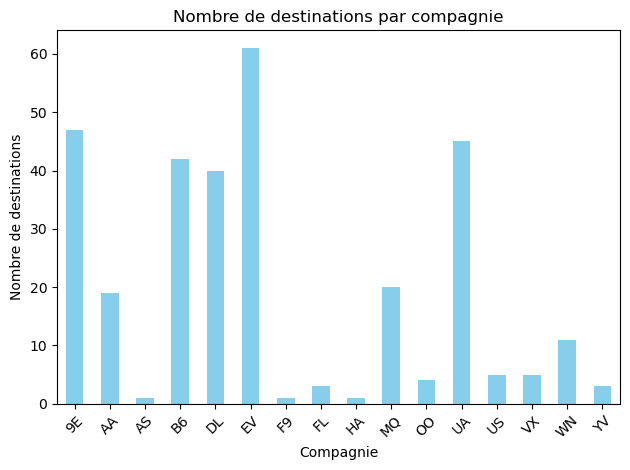

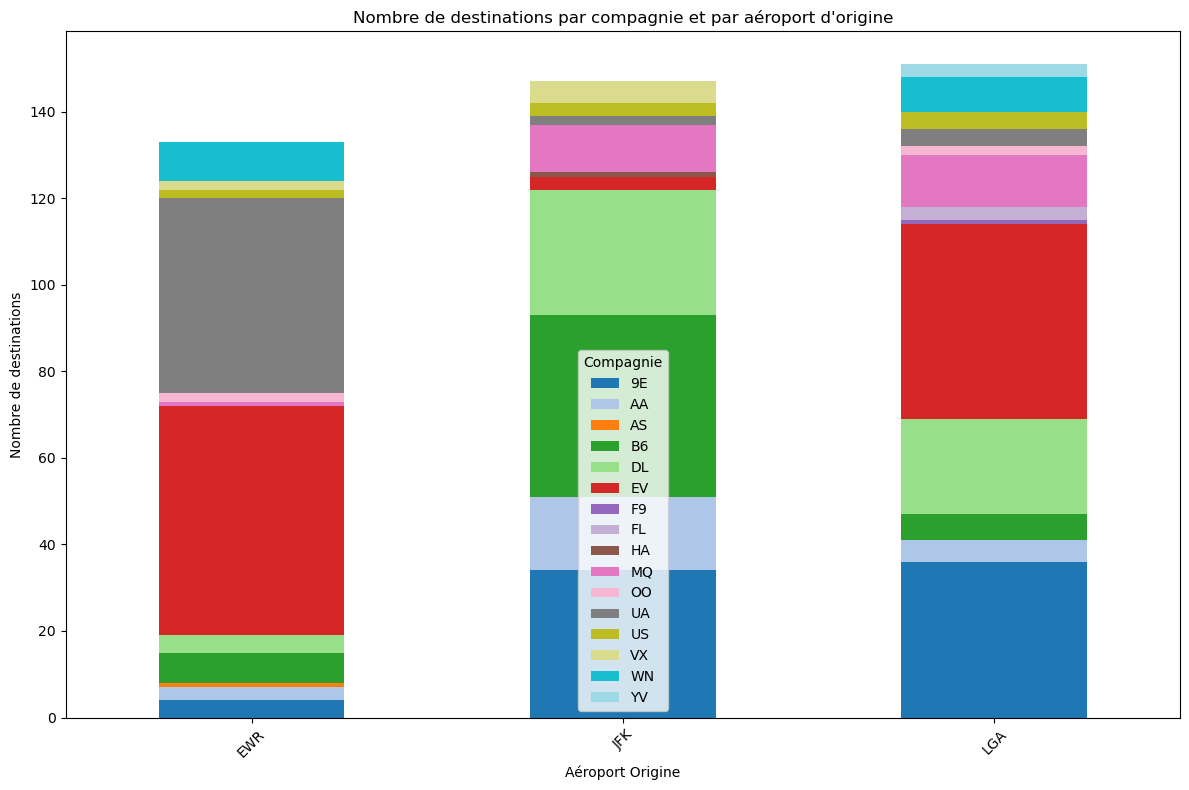

In [31]:
# Graphique 1 : Nombre de destinations par compagnie
plt.figure(figsize=(10, 6))
df_num_destinations.plot(kind='bar', x='Compagnie', y='Nombre de Destinations', legend=False, color='skyblue')
plt.title('Nombre de destinations par compagnie')
plt.xlabel('Compagnie')
plt.ylabel('Nombre de destinations')
plt.xticks(rotation=45)
plt.tight_layout()

# Enregistrer sous forme de PNG
plt.savefig('nombre_destinations_par_compagnie.png')

# Graphique 2 : Nombre de destinations par compagnie par aéroport d'origine
df_grouped = df_num_destinations_ori.pivot(index='Aéroport Origine', columns='Compagnie', values='Nombre de Destinations')

# Tracer un graphique empilé
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Nombre de destinations par compagnie et par aéroport d\'origine')
plt.xlabel('Aéroport Origine')
plt.ylabel('Nombre de destinations')
plt.xticks(rotation=45)
plt.tight_layout()

# Enregistrer sous forme de PNG
plt.savefig('destinations_par_compagnie_par_aeroport.png')

# Optionnel : Afficher le graphique
plt.show()
